# Titanic (Machine Learning from Disaster) - Análise Exploratória dos Dados
## Contexto

### 📌 Objetivos do EDA:
* Entender a estrutura e qualidade dos dados
* Identificar variáveis importantes
* Detectar outliers, valores ausentes e distribuições
* Formular hipóteses

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches


from setup_notebook import setup_path
setup_path()
from src.functions import *

from matplotlib.colors import LinearSegmentedColormap
import warnings

warnings.filterwarnings("ignore")

color_palette21 = [
    "#004C4C", "#006666", "#008080", "#199191", "#29A3A3",
    "#40B5B5", "#55C7C7", "#66D9D9", "#80ECEC", "#99FFFF", 
    "#FFD580", "#FFC460", "#FFB240", "#FFA020", "#FF8E00",
    "#FF7C00", "#FF6400", "#FF4C00", "#FF3300", "#FF1A00", "#FF0000"]

# Definir cores
color_binary = {
    0: color_palette21[-7],  # Vermelho para não sobreviveu
    1: color_palette21[3]   # Azul para sobreviveu
}

sns.set_palette(sns.color_palette(color_palette21))
sns.color_palette(color_palette21)

[(0.0, 0.2980392156862745, 0.2980392156862745),
 (0.0, 0.4, 0.4),
 (0.0, 0.5019607843137255, 0.5019607843137255),
 (0.09803921568627451, 0.5686274509803921, 0.5686274509803921),
 (0.1607843137254902, 0.6392156862745098, 0.6392156862745098),
 (0.25098039215686274, 0.7098039215686275, 0.7098039215686275),
 (0.3333333333333333, 0.7803921568627451, 0.7803921568627451),
 (0.4, 0.8509803921568627, 0.8509803921568627),
 (0.5019607843137255, 0.9254901960784314, 0.9254901960784314),
 (0.6, 1.0, 1.0),
 (1.0, 0.8352941176470589, 0.5019607843137255),
 (1.0, 0.7686274509803922, 0.3764705882352941),
 (1.0, 0.6980392156862745, 0.25098039215686274),
 (1.0, 0.6274509803921569, 0.12549019607843137),
 (1.0, 0.5568627450980392, 0.0),
 (1.0, 0.48627450980392156, 0.0),
 (1.0, 0.39215686274509803, 0.0),
 (1.0, 0.2980392156862745, 0.0),
 (1.0, 0.2, 0.0),
 (1.0, 0.10196078431372549, 0.0),
 (1.0, 0.0, 0.0)]

---
## 2. Dataload & Pré-visualização dos Dados 🗂️

In [2]:
# Carregando os dados
dfo = pd.read_csv("/home/akel/PycharmProjects/Kaggle/Titanic/data/raw/train.csv")
df=dfo.drop(columns='PassengerId')
NC=df.shape[1]
display(df.head(5))
inital_describe(df,True)
df.describe()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


📊 ANÁLISE EXPLORATÓRIA DO DATAFRAME

📈 DIMENSÕES DO DATASET:
   • 891 linhas
   • 11 colunas
   • Total de células: 9801

🔧 TIPOS DE DADOS:
   • object: 5 colunas
   • int64: 4 colunas
   • float64: 2 colunas

🔍 VERIFICAÇÃO DE QUALIDADE DOS DADOS

📝 REGISTROS DUPLICADOS:
   • Total: 0
   • Percentual: 0.00%

❌ VALORES NULOS:
   • Total: 866
   • Percentual: 8.84%

📊 COLUNAS COM VALORES NULOS:
   • Age: 177 nulos (19.87%)
   • Cabin: 687 nulos (77.10%)
   • Embarked: 2 nulos (0.22%)

✅ ANÁLISE CONCLUÍDA


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Comentários** \
Valores ausentes/Nulos

`Cabin` → 77% nulos.Transformar para `Hascabin` e `Deck`

`Age` → ~20% nulos. Imputação de valores

`Embarked` → 0.2% nulos. irrelevante em termos de volume.


### 2.1 Pré-visualização dos Dados 🗂️


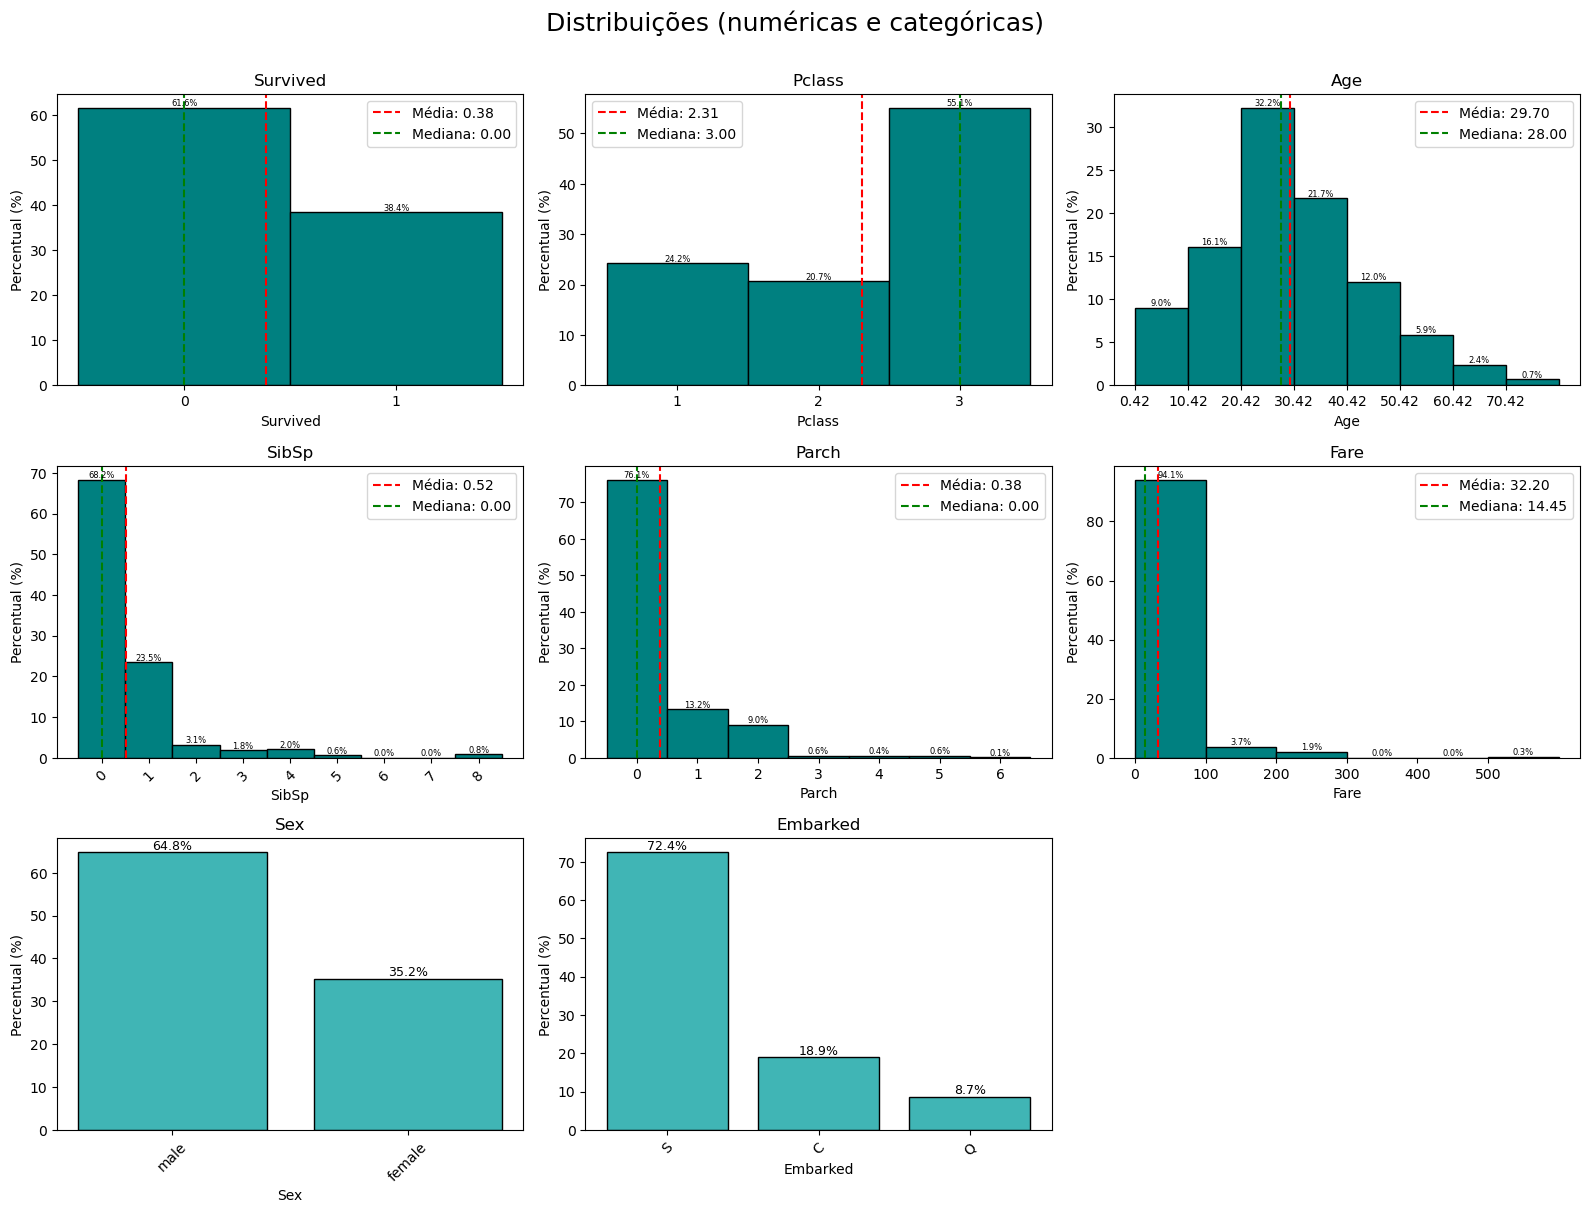

In [3]:
out=mult_plt2(df.drop(['Name','Ticket','Cabin'], axis=1),ncols=3,max_bins=10,figsize=(16,12))


**Comentários**
* `Survived`: ~38% sobrevivem.
* `Sex`:65% dos passageiros são homens.
* `Pclass`:Mais da metade está na 3ª classe (55%).
* `Age`:Pico entre 19–30 anos~30%. Crianças e idosos são minoria.
* `SibSP`+`Parch`: A maioria viaja sozinha (SibSp=0, Parch=0). 
* `Fare`: 94% pagam até 100. 

## 3.Pré-processamento de Dados
Criação e transformação das variaveis

**A. `HasCabin` e `Deck`**
  * `HasCabin` Cria uma variável binária a parti de `Cabin` 
  * `Deck` Extrai o primeiro caractere da string `Cabin` a fim de Preserva estrutura hierárquica implícita

**B. `Embarked`**

* Imputação por **moda** → apropriada dado o baixo volume de nulos.

**C.  Imputação hierárquica de idade (`Age2`)**
* Usa grupos de forma progressiva (`Sex`, `Pclass`, `HasCabin`) inputando o valor pela mediana;

**D. `Age_Group`**
* Agrupa em categorias de  faixa etária

**E. `FamilySize`**
* Calcula o tamanho da familia a partir das features `SibSp` e `Parch`


In [4]:
#transformação das variaveis

if 'Cabin' in df.columns:
    # Variable HasCabin
    df['HasCabin'] = df['Cabin'].notnull().astype(int)
    # Variable HasCabin 
    df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')
    df.drop(columns='Cabin', inplace=True)

    
# fill with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) 

# Variable Age imputed is Age2
if 'Age' in df.columns:
    coll_age=['Sex','Pclass','HasCabin']
    df['Age2']=df['Age'].copy()
    for i in range(len(coll_age)):
        if df['Age2'].isnull().sum()>0:
            df['Age2'] = df['Age2'].fillna(df.groupby(coll_age[0:3-i])['Age'].transform('median'))
        df['Age2'] = df['Age2'].fillna(df['Age'].median())
    df.drop(columns='Age', inplace=True)



df['Age_Group'] = pd.cut(df['Age2'], bins=[0, 12, 18, 30, 50, 80], 
                         labels=['Criança (<12)', 'Adolescente (12-18)', 
                                 'Adulto Jovem (19-30)', 'Adulto (31-50)', 
                                 'Idoso (>50)'])
  
# Variable FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
#df.sample(5)
#out=mult_plt2(df.drop(['Name','Ticket','HasCabin'], axis=1),ncols=3,max_bins=10,figsize=(16,12))

## 4- Distribuições Bivariadas
### A. Percentual de Sobreviventes/Sexo

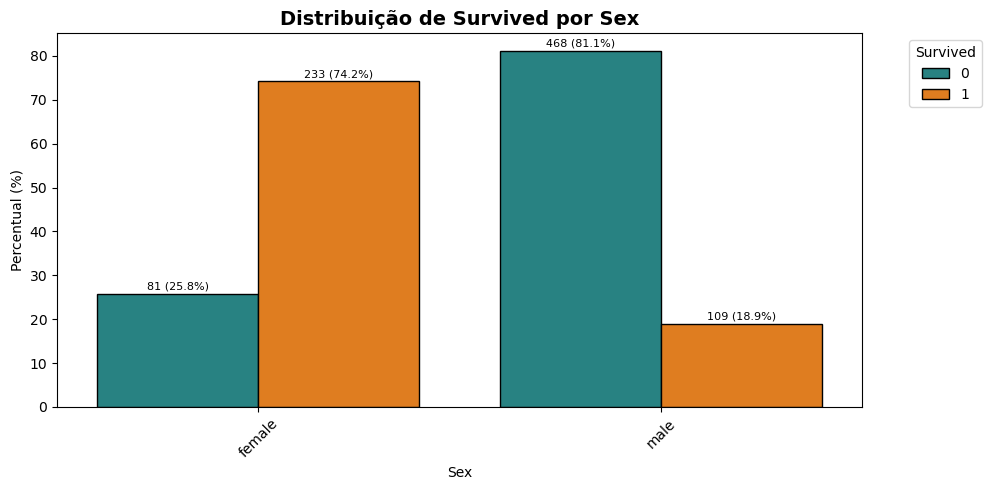

In [5]:
stats1,stats2= bar_bar_cat(df,'Sex','Survived',figsize=(10,5))

**Comentários:** 74% das Mulheres sobrevivem x 19% Homens

### B. Percentual de Sobreviventes por classe

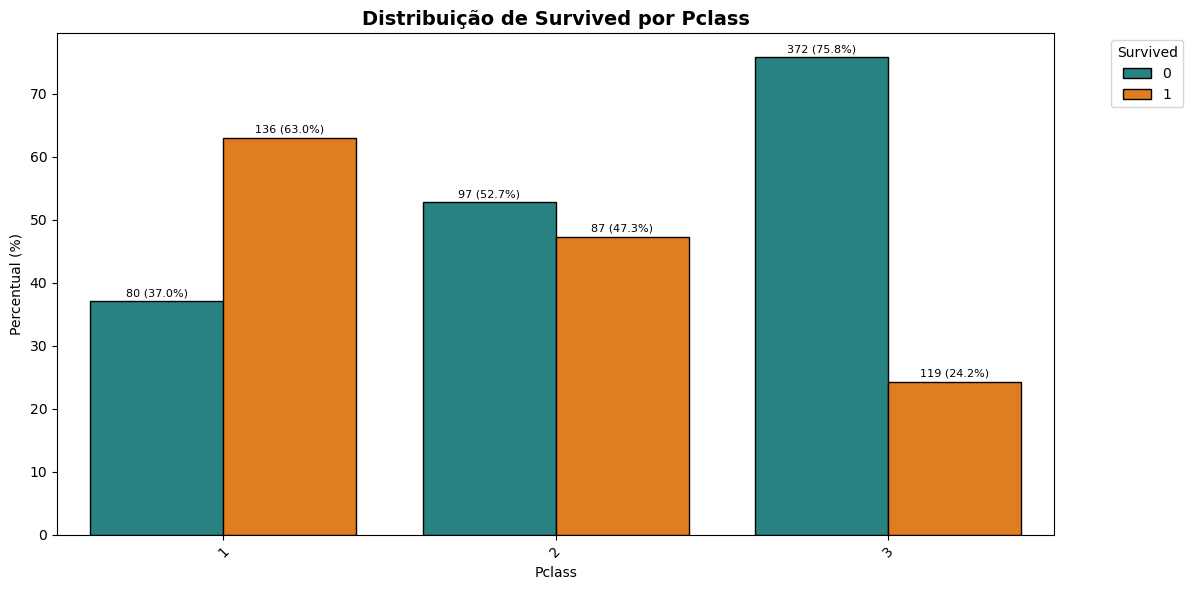

In [6]:
stats1,stats2= bar_bar_cat(df,'Pclass','Survived')

**Comentários:** 63% da tripulação na primeira classe sobrevive. Cai para 47% na segunda classe e 24% na terceira classe

### C. Percentual de Sobreviventes por Local de Embarque

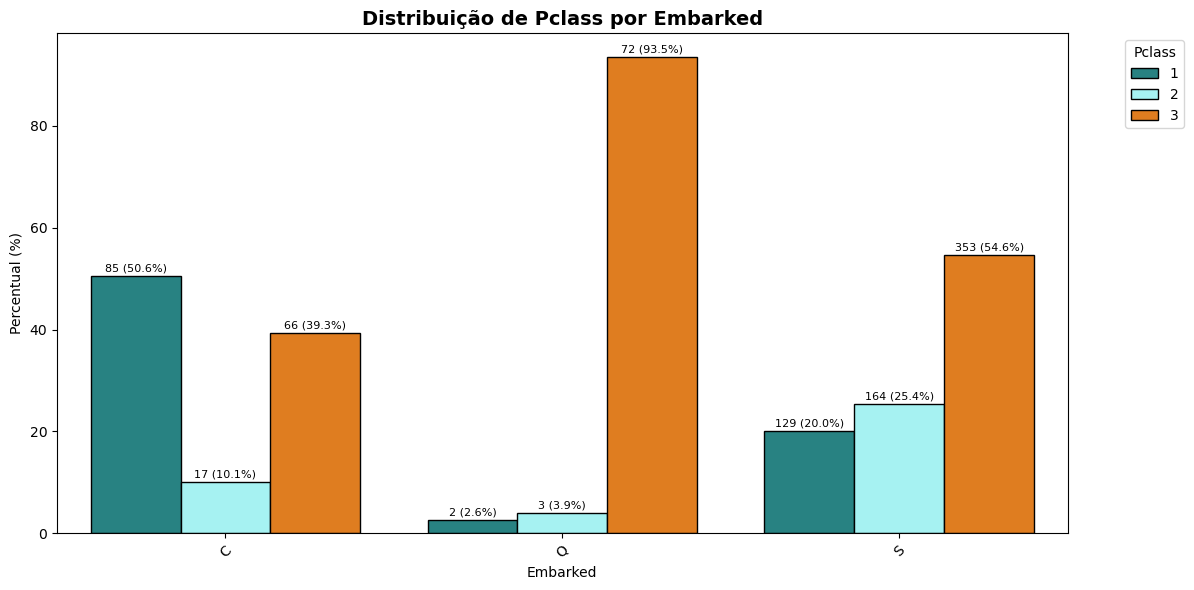

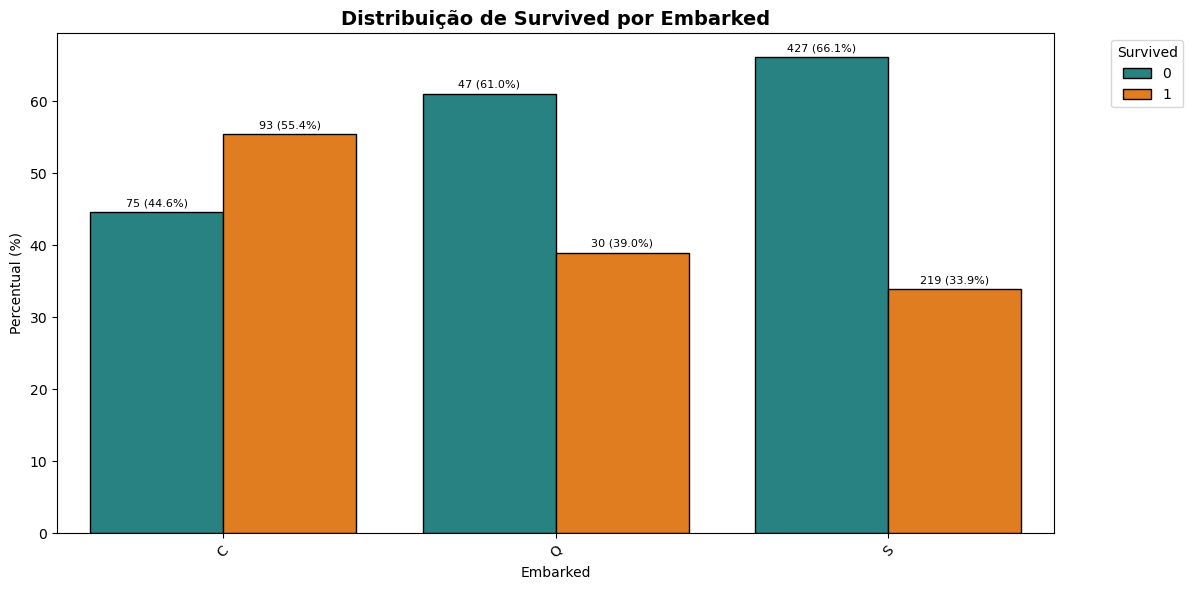

In [7]:
stats1,stats2= bar_bar_cat(df,'Embarked','Pclass')
stats3,stats4= bar_bar_cat(df,'Embarked','Survived')

**Comentários:** 
* Porto C tem maior sobrevivência (~55%), em especial pelo maior numero de passageiros da primeira classe.
* Porto Q Majoritaraiamente(93%) tripulação que embarcou é  da terceira classe;
* Porto S ~70% de toda tripulação embarcou neste porto;

### D. Percentual de Sobreviventes por ter Cabine

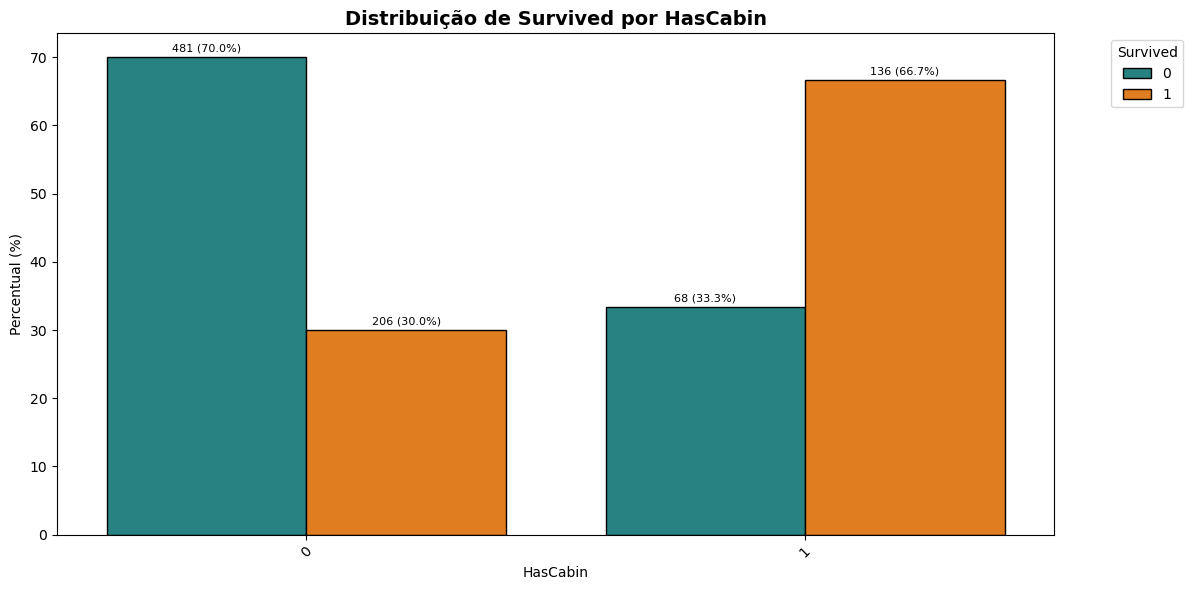

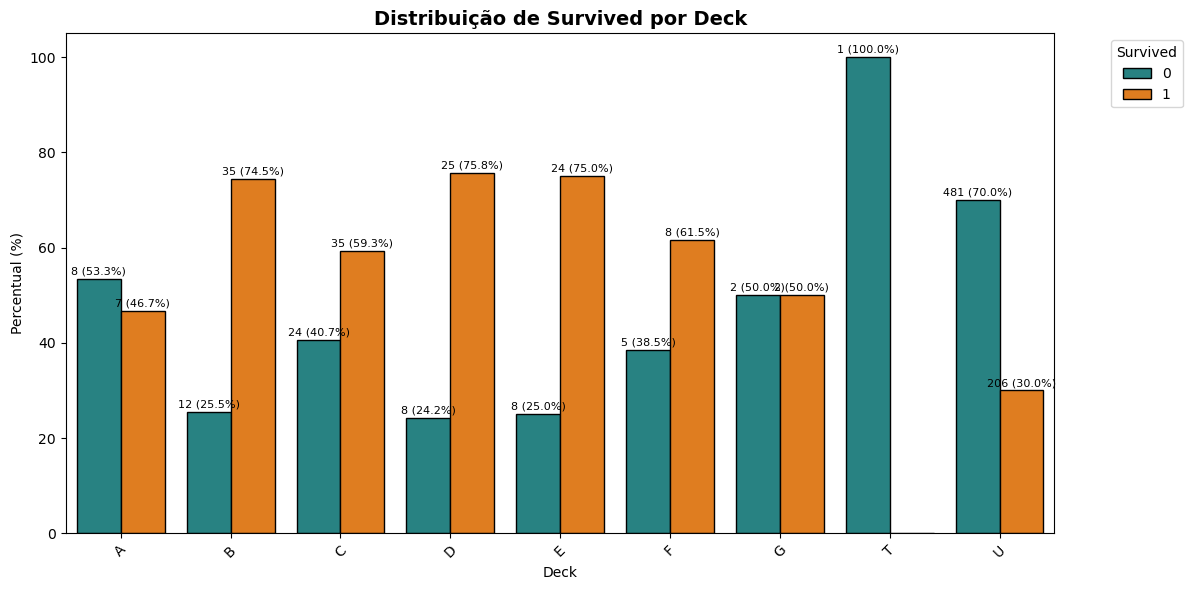

In [8]:
stats1,stats2= bar_bar_cat(df,'HasCabin','Survived')
stats1,stats2= bar_bar_cat(df,'Deck','Survived')

**Comentários:** 
* Com cabine 67% sobrevivem enquanto que sem, apenas 30%.;
* Dos sobreviventes com cabine notamos que há uma maior chance nos decks B-F com no minimo 60% de chance de sobreviver.



### E. Percentual de Sobreviventes por faixa etária

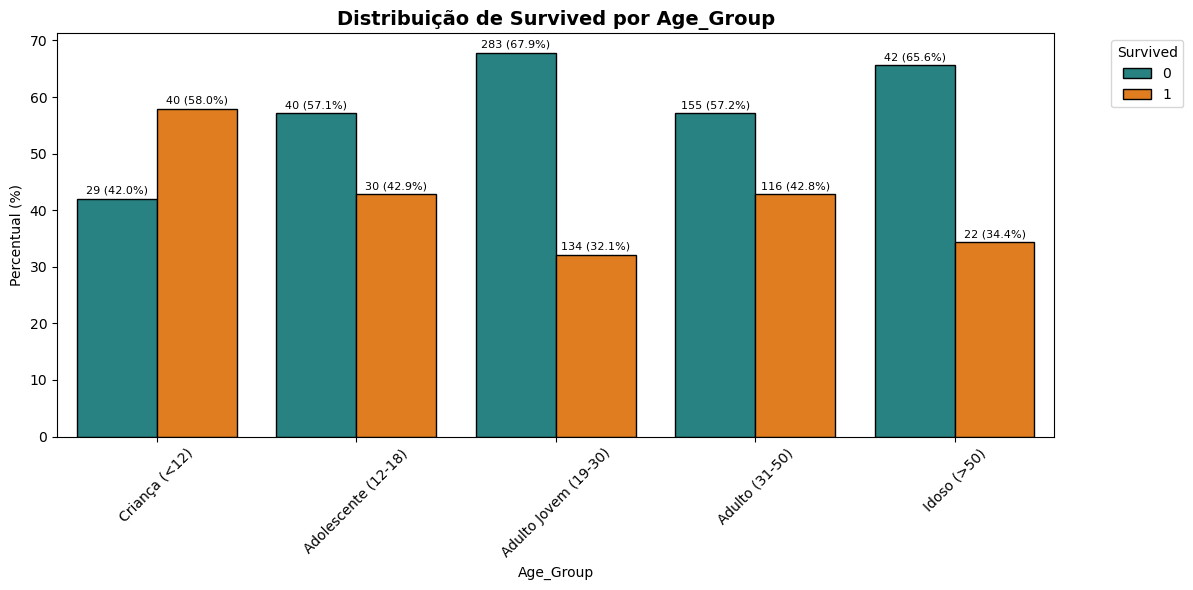

In [9]:
stats1,stats2= bar_bar_cat(df,'Age_Group','Survived')

**Comentários :** Crianças têm maior chance (~58%),Enquanto que Adultos jovens têm pior desempenho(32%)

### F. Percentual de Sobreviventes por Tamanho da familia

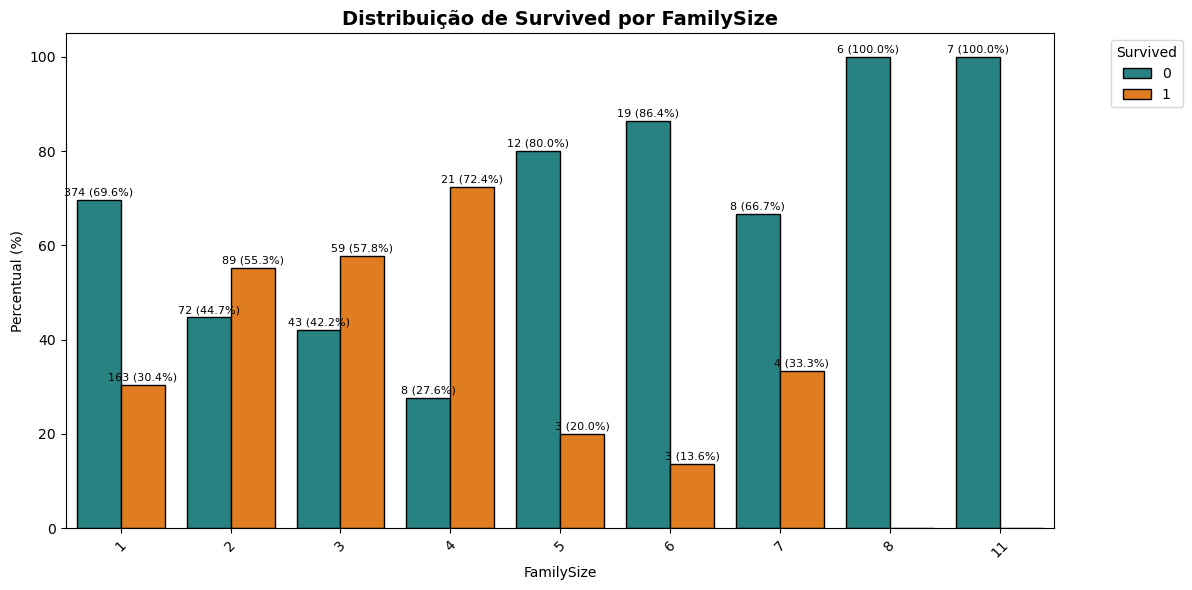

In [10]:
stats1,stats2= bar_bar_cat(df,'FamilySize','Survived')

**Comentários :** Famílias de 2 a 4 pessoas maior sobrevivência enquanto que os extremos(Muito grandes ou muito pequenas)tem  o pior desfecho.


## 5.Dispersão & Correlação
### 5.1 Dispersão

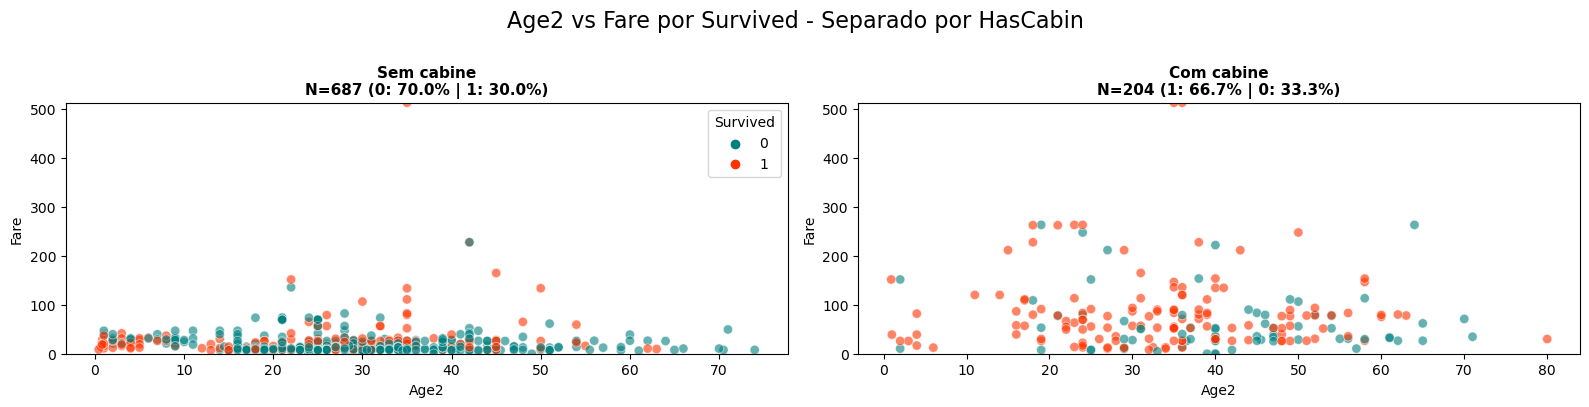

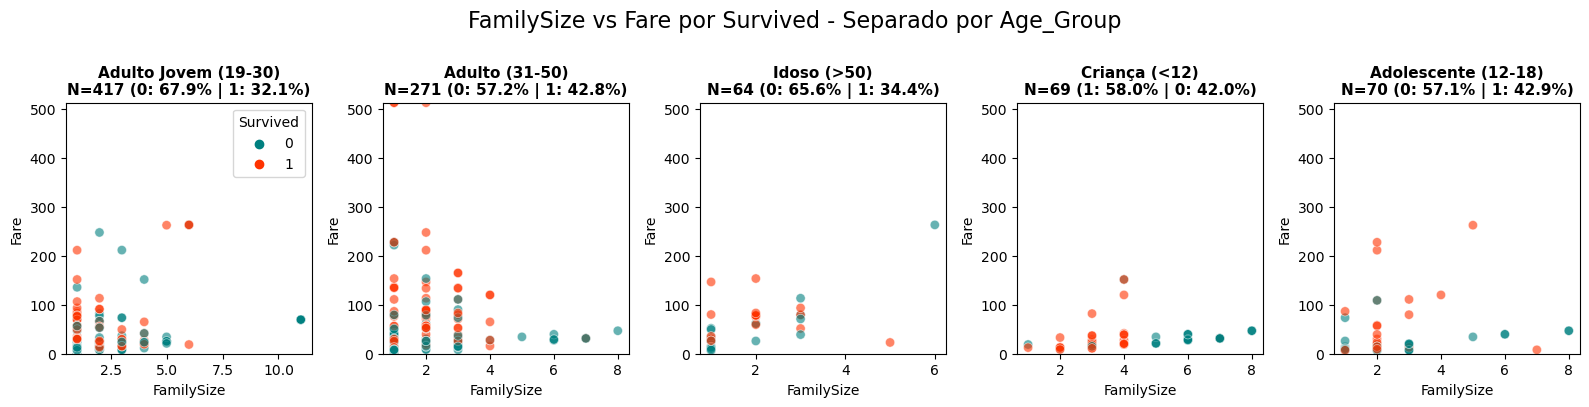

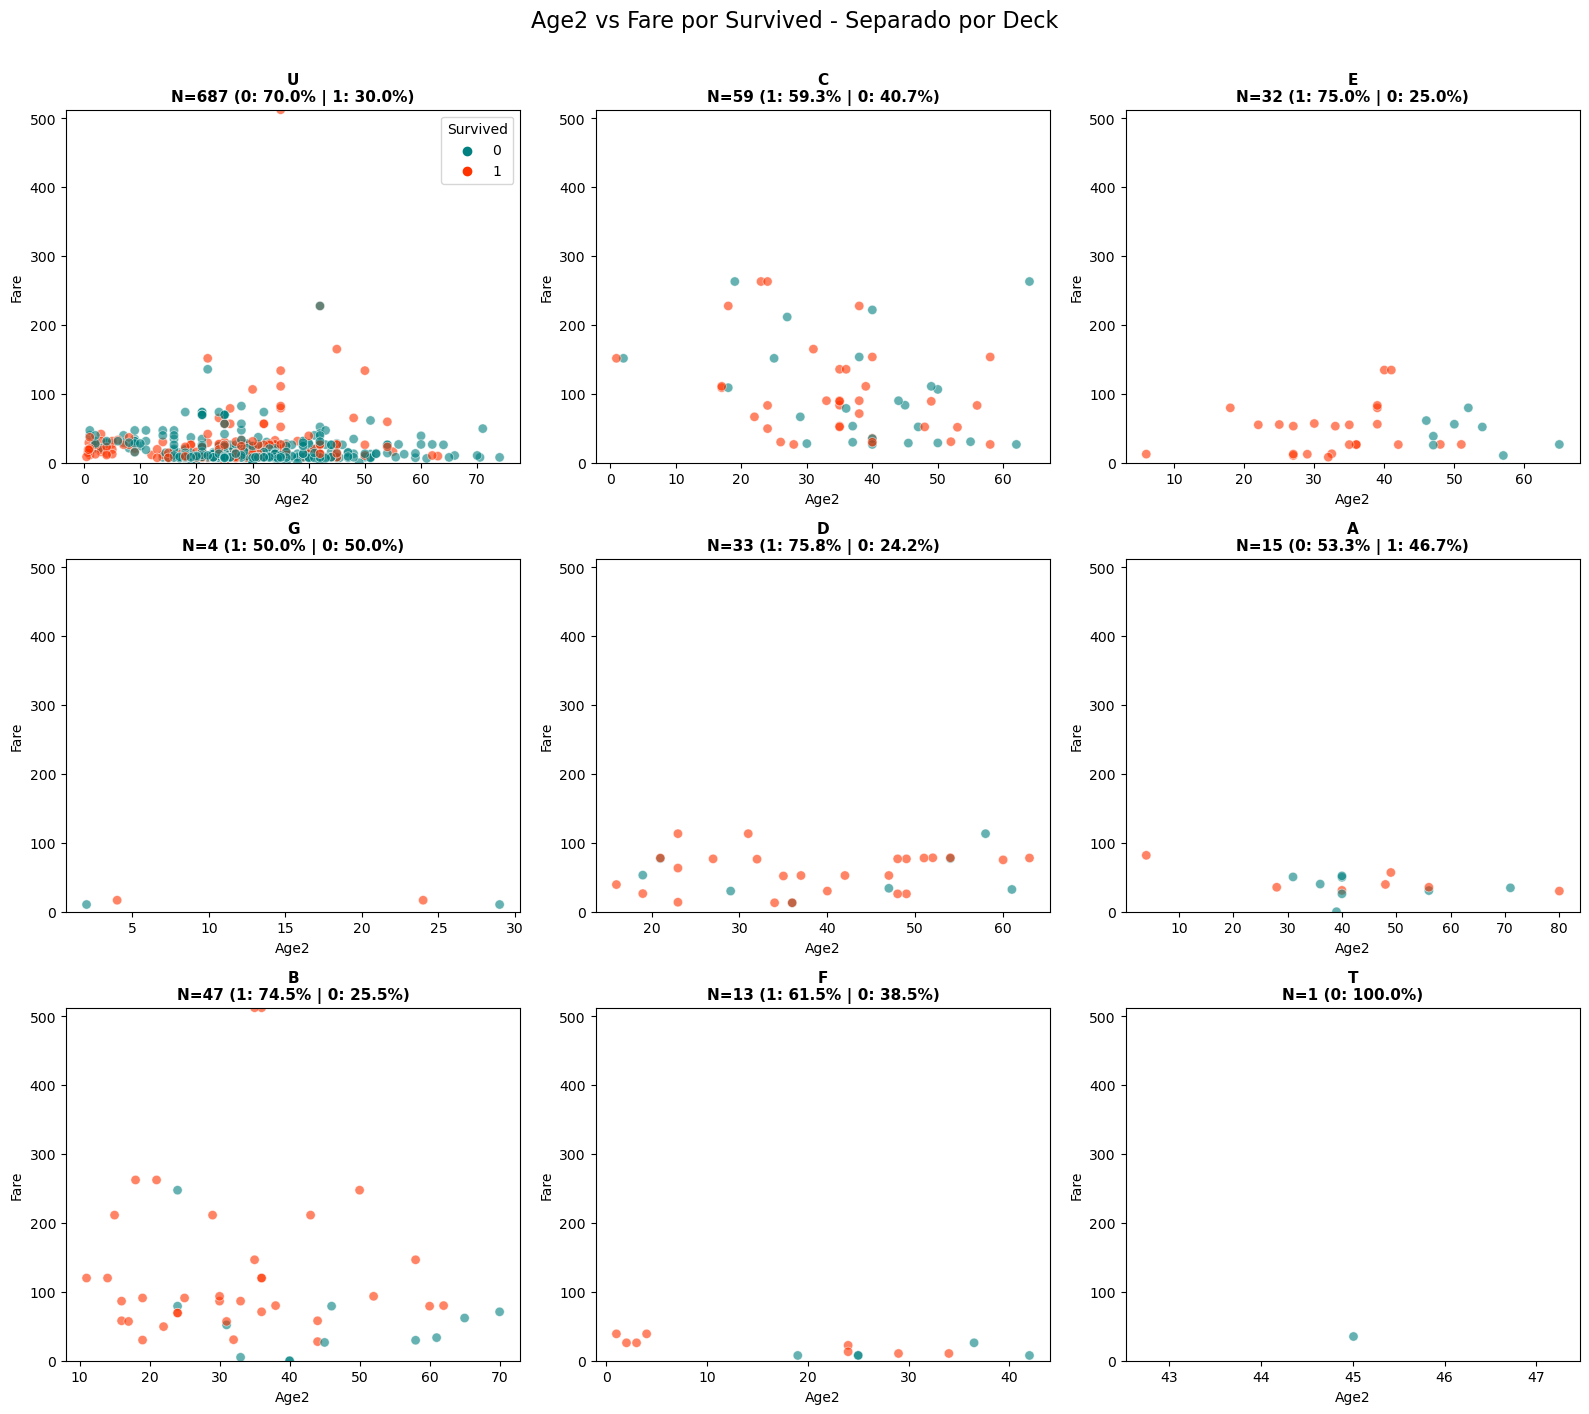

In [11]:
out1=scatter_by_category(df,'Age2','Fare',
    hue_var='Survived',category_var='HasCabin',
    ncols=2,category_name=['Sem cabine','Com cabine'])

out2=scatter_by_category(df,'FamilySize','Fare',
    hue_var='Survived', category_var='Age_Group',
    ncols=5)
out3=scatter_by_category(df,'Age2','Fare',
    hue_var='Survived', category_var='Deck',
    ncols=3)

### 5.2 Correlação

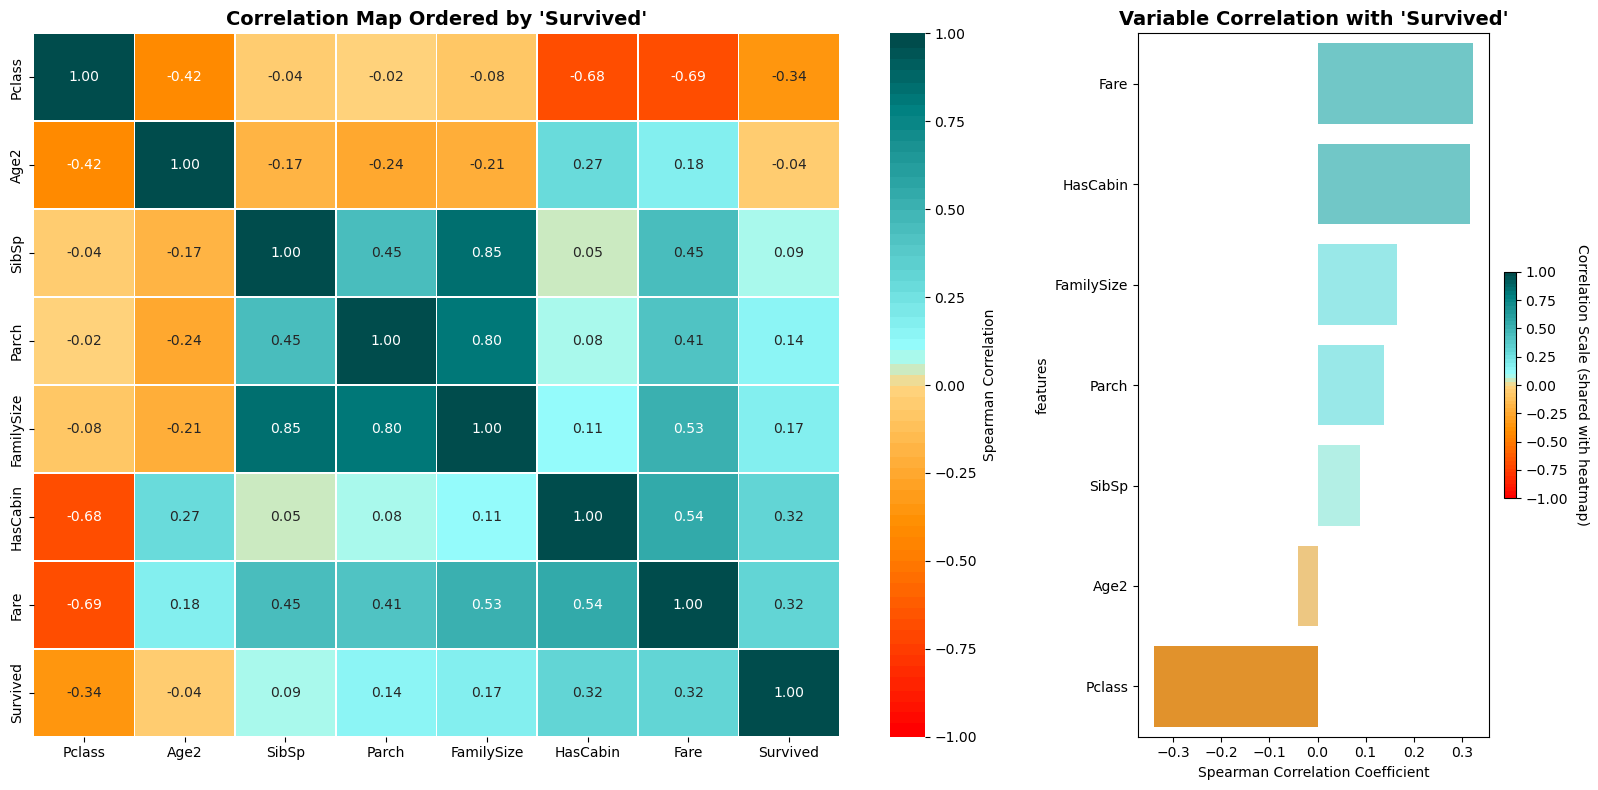

,Pclass,Age2,SibSp,Parch,FamilySize,HasCabin,Fare,Survived
Pclass,1.000000,-0.417180,-0.043019,-0.022801,-0.075698,-0.683291,-0.688032,-0.339668
Age2,-0.417180,1.000000,-0.167143,-0.236298,-0.205532,0.271878,0.175515,-0.040361
SibSp,-0.043019,-0.167143,1.000000,0.450014,0.849165,0.052421,0.447113,0.088879
Parch,-0.022801,-0.236298,0.450014,1.000000,0.801224,0.080353,0.410074,0.138266
FamilySize,-0.075698,-0.205532,0.849165,0.801224,1.000000,0.109296,0.528907,0.165463
HasCabin,-0.683291,0.271878,0.052421,0.080353,0.109296,1.000000,0.539300,0.316912
Fare,-0.688032,0.175515,0.447113,0.410074,0.528907,0.539300,1.000000,0.323736
Survived,-0.339668,-0.040361,0.088879,0.138266,0.165463,0.316912,0.323736,1.000000


In [12]:
#Correlação
corr_vars = [
    'Survived',
    'Pclass',
    'Fare',
    'Age2',
    'FamilySize',
    'SibSp',
    'Parch',
    'HasCabin'
]
corr,corr_tag=correlation_bar(df[corr_vars],'Survived',metodo='spearman')
corr

---
## 6 Síntese dos principais achados

A sobrevivência no Titanic foi fortemente condicionada por fatores estruturais e socioeconômicos — classe, localização física no navio e acesso aos botes — enquanto idade e composição familiar atuaram de forma secundária e não linear.

1. **Sobrevivência no Titanic não foi aleatória**

   * Sexo, classe, cabine e família explicam grande parte da variância.

2. **Variáveis latentes foram corretamente reveladas**

   * `HasCabin`, `Deck`, `FamilySize`, `Age_Group` são superiores às originais.
   * 
3. **Classe social é um dos fatores mais determinantes de sobrevivência**

    * Quanto melhor a classe, maior a probabilidade de sobrevivência CORR~0.34

4. **Relações são majoritariamente não lineares**

   * Especialmente idade, tarifa e tamanho da família.
